# 6105 Frogs_MFCCs

Name:XiaoyangJin

NUID:001564764

In [ ]:
# 安装 PyDrive 操作库，该操作每个 notebook 只需要执行一次
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 授权登录，仅第一次的时候会鉴权
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# **Assignment 1**

## Abstract:
I choose the dataset including acoustic features extracted from syllables of anuran (frogs) calls, including the family, the genus, and the species labels (multilabel). 


I am trying to predict the class of a frog based on its acoustic features. This is a classification problem. I am going to use logistic regression, what's more, visualizing the data is a critical part of my work. 

After training my model, I got 80.36% correct rate about my testing data.


## prepare:
import packages in python

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import palettable
import statsmodels.api as sm
from numpy import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import gaussian_kde
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
url = 'https://github.com/XiaoyangJin/XiaoyangJin-INFO6105/blob/main/Frogs_MFCCs.csv?raw=true'
df = pd.read_csv(url)

X = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3','MFCCs_ 4','MFCCs_ 5','MFCCs_ 6','MFCCs_ 7','MFCCs_ 8','MFCCs_ 9', 'MFCCs_10','MFCCs_11','MFCCs_12','MFCCs_13','MFCCs_14','MFCCs_15','MFCCs_16','MFCCs_17','MFCCs_18','MFCCs_19','MFCCs_20','MFCCs_21','MFCCs_22']]
X_y = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3','MFCCs_ 4','MFCCs_ 5','MFCCs_ 6','MFCCs_ 7','MFCCs_ 8','MFCCs_ 9', 'MFCCs_10','MFCCs_11','MFCCs_12','MFCCs_13','MFCCs_14','MFCCs_15','MFCCs_16','MFCCs_17','MFCCs_18','MFCCs_19','MFCCs_20','MFCCs_21','MFCCs_22','RecordID']]
print(df)
print(X_y)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  ...      Genus         Species  RecordID
0          1.0  0.152936 -0.105586  ...  Adenomera  AdenomeraAndre         1
1          1.0  0.171534 -0.098975  ...  Adenomera  AdenomeraAndre         1
2          1.0  0.152317 -0.082973  ...  Adenomera  AdenomeraAndre         1
3          1.0  0.224392  0.118985  ...  Adenomera  AdenomeraAndre         1
4          1.0  0.087817 -0.068345  ...  Adenomera  AdenomeraAndre         1
...        ...       ...       ...  ...        ...             ...       ...
7190       1.0 -0.554504 -0.337717  ...     Scinax     ScinaxRuber        60
7191       1.0 -0.517273 -0.370574  ...     Scinax     ScinaxRuber        60
7192       1.0 -0.582557 -0.343237  ...     Scinax     ScinaxRuber        60
7193       1.0 -0.519497 -0.307553  ...     Scinax     ScinaxRuber        60
7194       1.0 -0.508833 -0.324106  ...     Scinax     ScinaxRuber        60

[7195 rows x 26 columns]
      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  ...  MFCCs_21 

using MinMaxScaler to preprocess data

In [38]:
X_min_max = MinMaxScaler().fit_transform(X)
X_preprocess = pd.DataFrame(X_min_max)
print(X_preprocess)

       0         1         2         3   ...        18        19        20        21
0     1.0  0.493693  0.230108  0.457262  ...  0.534822  0.505537  0.669615  0.484704
1     1.0  0.504810  0.234712  0.503234  ...  0.514315  0.460275  0.625237  0.503209
2     1.0  0.493323  0.245855  0.515934  ...  0.489280  0.405755  0.645765  0.562490
3     1.0  0.536404  0.386491  0.544660  ...  0.438460  0.369970  0.502213  0.496923
4     1.0  0.454770  0.256042  0.529406  ...  0.471886  0.398205  0.657343  0.565055
...   ...       ...       ...       ...  ...       ...       ...       ...       ...
7190  1.0  0.070843  0.068460  0.345093  ...  0.559651  0.499227  0.498351  0.368996
7191  1.0  0.093096  0.045580  0.341792  ...  0.556587  0.492008  0.506202  0.341846
7192  1.0  0.054075  0.064616  0.340974  ...  0.534727  0.469551  0.524344  0.368299
7193  1.0  0.091767  0.089465  0.317622  ...  0.556760  0.486392  0.490978  0.348004
7194  1.0  0.098141  0.077938  0.363110  ...  0.539275  0.474042 

split data into train data and test data

In [39]:
x, y = X_preprocess, df[['RecordID']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
train= np.column_stack((x_train,y_train))
test = np.column_stack((x_test, y_test))
train_pd = pd.DataFrame(train)
train_pd.columns=['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7',
                       'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14',
                       'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21',
                       'MFCCs_22', 'RecordID']

<class 'pandas.core.frame.DataFrame'>


*Q:Which independent variables are useful to predict a target(dependent variable)?*

A:In this dataset, From MFCCs_ 1 to MFCCs_22 are all predictor variables(independent variables), RecordedID is the target(dependent variable).

I will calculate their p value to judge where the independent variable is useful.

Model: Logistic regression

In [40]:
train_pd['intercept'] = 1.0
print(train_pd.head())
pred=['RecordID','intercept']
print(train_pd[pred])

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  ...  MFCCs_22  RecordID  intercept
0  1.000000  0.598019  0.500316  ...  0.703627      17.0        1.0
1  1.000000  0.541440  0.203127  ...  0.518429      13.0        1.0
2  0.973179  0.674789  1.000000  ...  0.337744      37.0        1.0
3  1.000000  0.556416  0.382189  ...  0.775779      15.0        1.0
4  1.000000  0.642479  0.695841  ...  0.573387       8.0        1.0

[5 rows x 24 columns]
      RecordID  intercept
0         17.0        1.0
1         13.0        1.0
2         37.0        1.0
3         15.0        1.0
4          8.0        1.0
...        ...        ...
5031      22.0        1.0
5032      36.0        1.0
5033      36.0        1.0
5034      37.0        1.0
5035      11.0        1.0

[5036 rows x 2 columns]


In [41]:
print("---------------------------MFCCs_ 1-------------------------------------------")
logistic_regression_model_1 = sm.Logit(train_pd['MFCCs_ 1'], train_pd[pred]).fit()
print(logistic_regression_model_1.summary())
print("---------------------------MFCCs_ 2-------------------------------------------")
logistic_regression_model_2 = sm.Logit(train_pd['MFCCs_ 2'], train_pd[pred]).fit()
print(logistic_regression_model_2.summary())
print("---------------------------MFCCs_ 3-------------------------------------------")
logistic_regression_model_3 = sm.Logit(train_pd['MFCCs_ 3'], train_pd[pred]).fit()
print(logistic_regression_model_3.summary())
print("---------------------------MFCCs_ 4-------------------------------------------")
logistic_regression_model_4 = sm.Logit(train_pd['MFCCs_ 4'], train_pd[pred]).fit()
print(logistic_regression_model_4.summary())
print("---------------------------MFCCs_ 5-------------------------------------------")
logistic_regression_model_5 = sm.Logit(train_pd['MFCCs_ 5'], train_pd[pred]).fit()
print(logistic_regression_model_5.summary())
print("---------------------------MFCCs_ 6-------------------------------------------")
logistic_regression_model_6 = sm.Logit(train_pd['MFCCs_ 6'], train_pd[pred]).fit()
print(logistic_regression_model_6.summary())
print("---------------------------MFCCs_ 7-------------------------------------------")
logistic_regression_model_7 = sm.Logit(train_pd['MFCCs_ 7'], train_pd[pred]).fit()
print(logistic_regression_model_7.summary())
print("---------------------------MFCCs_ 8-------------------------------------------")
logistic_regression_model_8 = sm.Logit(train_pd['MFCCs_ 8'], train_pd[pred]).fit()
print(logistic_regression_model_8.summary())
print("---------------------------MFCCs_ 9-------------------------------------------")
logistic_regression_model_9 = sm.Logit(train_pd['MFCCs_ 9'], train_pd[pred]).fit()
print(logistic_regression_model_9.summary())
print("---------------------------MFCCs_10-------------------------------------------")
logistic_regression_model_10 = sm.Logit(train_pd['MFCCs_10'], train_pd[pred]).fit()
print(logistic_regression_model_10.summary())
print("---------------------------MFCCs_11-------------------------------------------")
logistic_regression_model_11 = sm.Logit(train_pd['MFCCs_11'], train_pd[pred]).fit()
print(logistic_regression_model_11.summary())
print("---------------------------MFCCs_12-------------------------------------------")
logistic_regression_model_12 = sm.Logit(train_pd['MFCCs_12'], train_pd[pred]).fit()
print(logistic_regression_model_12.summary())
print("---------------------------MFCCs_13-------------------------------------------")
logistic_regression_model_13 = sm.Logit(train_pd['MFCCs_13'], train_pd[pred]).fit()
print(logistic_regression_model_13.summary())
print("---------------------------MFCCs_14-------------------------------------------")
logistic_regression_model_14 = sm.Logit(train_pd['MFCCs_14'], train_pd[pred]).fit()
print(logistic_regression_model_14.summary())
print("---------------------------MFCCs_15-------------------------------------------")
logistic_regression_model_15 = sm.Logit(train_pd['MFCCs_15'], train_pd[pred]).fit()
print(logistic_regression_model_15.summary())
print("---------------------------MFCCs_16-------------------------------------------")
logistic_regression_model_16 = sm.Logit(train_pd['MFCCs_16'], train_pd[pred]).fit()
print(logistic_regression_model_16.summary())
print("---------------------------MFCCs_17-------------------------------------------")
logistic_regression_model_17 = sm.Logit(train_pd['MFCCs_17'], train_pd[pred]).fit()
print(logistic_regression_model_17.summary())
print("---------------------------MFCCs_18-------------------------------------------")
logistic_regression_model_18 = sm.Logit(train_pd['MFCCs_18'], train_pd[pred]).fit()
print(logistic_regression_model_18.summary())
print("---------------------------MFCCs_19-------------------------------------------")
logistic_regression_model_19 = sm.Logit(train_pd['MFCCs_19'], train_pd[pred]).fit()
print(logistic_regression_model_19.summary())
print("---------------------------MFCCs_20-------------------------------------------")
logistic_regression_model_20 = sm.Logit(train_pd['MFCCs_20'], train_pd[pred]).fit()
print(logistic_regression_model_20.summary())
print("---------------------------MFCCs_21-------------------------------------------")
logistic_regression_model_21 = sm.Logit(train_pd['MFCCs_21'], train_pd[pred]).fit()
print(logistic_regression_model_21.summary())
print("---------------------------MFCCs_22-------------------------------------------")
logistic_regression_model_22 = sm.Logit(train_pd['MFCCs_22'], train_pd[pred]).fit()
print(logistic_regression_model_22.summary())



---------------------------MFCCs_ 1-------------------------------------------
Optimization terminated successfully.
         Current function value: 0.018584
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               MFCCs_ 1   No. Observations:                 5036
Model:                          Logit   Df Residuals:                     5034
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                 -0.7068
Time:                        03:42:57   Log-Likelihood:                -93.588
converged:                       True   LL-Null:                       -54.833
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RecordID      -0.0634      0

But look at the results, all p-values are 1.000, so I used heatmap instead.

seaborn heatmap https://pythonbasics.org/seaborn-heatmap/

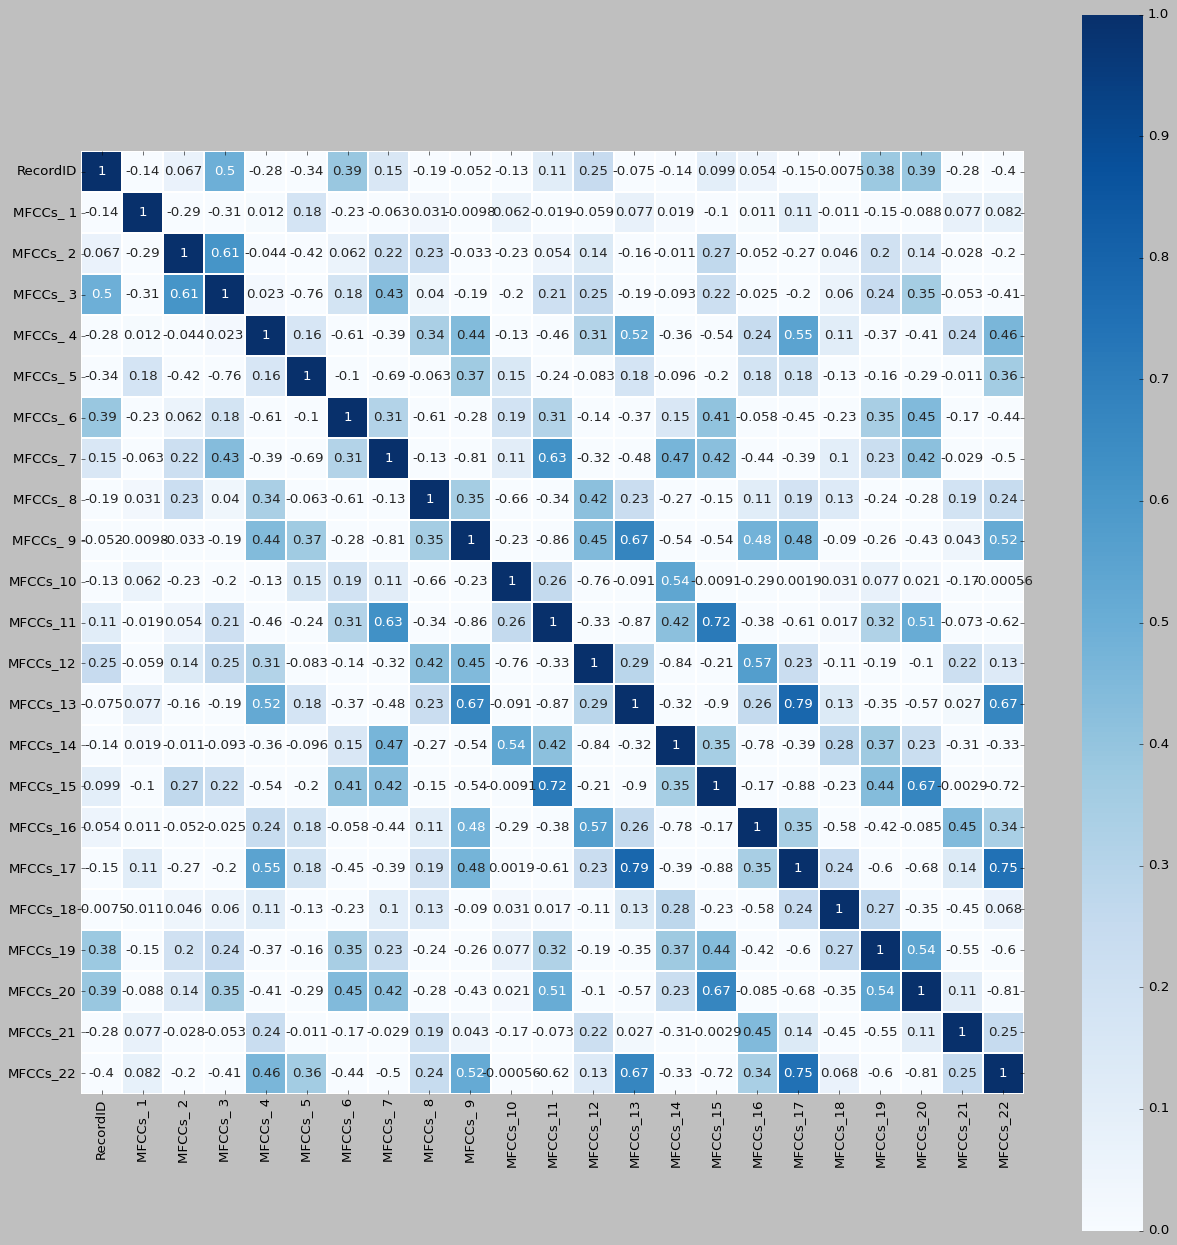

In [42]:
train_heatmap= np.column_stack((y_train,x_train))
train_heatmap_pd = pd.DataFrame(train_heatmap)
train_heatmap_pd.columns=['RecordID', 'MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7',
                       'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14',
                       'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21',
                       'MFCCs_22']

corr = train_heatmap_pd.corr()
plt.figure(figsize=(19, 19))
ax1 = sns.heatmap(corr, cbar=1, linewidths=1,vmax=1, vmin=0, square=True, cmap='Blues',annot=True)
plt.show()

We can check the values printed on each little square. I personaly considered that if the value's abs is bigger than 0.2, then it is useful. So let's take a look at the first line, MFCCs_3, 4, 5, 6, 12, 19, 20, 21, 22 are all useful.

*Q:Which independent variable have missing data?*

A:None of them.

In [43]:
print(df[df.isnull().values==True])

Empty DataFrame
Columns: [MFCCs_ 1, MFCCs_ 2, MFCCs_ 3, MFCCs_ 4, MFCCs_ 5, MFCCs_ 6, MFCCs_ 7, MFCCs_ 8, MFCCs_ 9, MFCCs_10, MFCCs_11, MFCCs_12, MFCCs_13, MFCCs_14, MFCCs_15, MFCCs_16, MFCCs_17, MFCCs_18, MFCCs_19, MFCCs_20, MFCCs_21, MFCCs_22, Family, Genus, Species, RecordID]
Index: []


*Q:Do the training and test sets have the same data?*

A: First of all, I would remove the repeated data from train and test. Then I would check whther the train is equal to train_unique (same for test). 

There is no "False" appeared, so there is no repeated data.

In [44]:
train_unique = np.array(train)
print(np.array(list(set([tuple(t) for t in train_unique]))))
print(train_unique == train)

test_unique = np.array(test)
print(np.array(list(set([tuple(t) for t in test_unique]))))
print(test_unique == test)

[[ 1.          0.80390511  0.79122036 ...  0.64535637  0.4054989
   8.        ]
 [ 1.          0.52296933  0.37762522 ...  0.57073803  0.65613252
  15.        ]
 [ 1.          0.67804239  0.55589492 ...  0.54192942  0.55612759
  40.        ]
 ...
 [ 1.          0.59441599  0.44256865 ...  0.56446795  0.52222903
  13.        ]
 [ 1.          0.49285405  0.50526314 ...  0.48867153  0.47722453
  43.        ]
 [ 1.          0.47521244  0.31580347 ...  0.50160986  0.2471142
  32.        ]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[ 1.          0.59646561  0.55008378 ...  0.60359005  0.71463876
  19.        ]
 [ 1.          0.83098287  0.5507199  ...  0.65119395  0.84055964
  22.        ]
 [ 1.          0.68397408  0.45406549 ...  0.44418317  0.85696628
  22.        ]
 ..

*Q:Is the predictor variables independent of all the other predictor variables?*

A:I am going to calculate the VIFs of all predictor variables. VIF is short for variance_inflation_factor. It is used to detecting multicollinearity.

Here is the defination of VIFs:

VIFs = 1/(1-R^2)

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

citation: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

btw, we can just use the row data. It is fine and even better that we do not use standardized data.

In [45]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

     feature        VIF
0   MFCCs_ 1  22.054720
1   MFCCs_ 2   7.445189
2   MFCCs_ 3  14.559857
3   MFCCs_ 4  26.078605
4   MFCCs_ 5  11.252097
5   MFCCs_ 6   7.487522
6   MFCCs_ 7  12.202206
7   MFCCs_ 8   7.138325
8   MFCCs_ 9  30.830383
9   MFCCs_10  13.679170
10  MFCCs_11  38.937414
11  MFCCs_12  24.003761
12  MFCCs_13  59.322413
13  MFCCs_14  24.939909
14  MFCCs_15  50.377768
15  MFCCs_16  18.724163
16  MFCCs_17  34.287304
17  MFCCs_18   9.267005
18  MFCCs_19  12.351017
19  MFCCs_20  16.137835
20  MFCCs_21   5.697920
21  MFCCs_22  12.381860


Here we can see VIFs of all predictor variables. If we regard whether above 5 as the criterion for judging whether there is a serious multicollinearity, all 22 predictor variables are having serious multicollinearity. 

However, whether above 10 as the criterion for judging whether there is a serious multicollinearity is also very popular. In that condition, MFCCs_ 2, MFCCs_ 6, MFCCs_ 8, MFCCs_18, MFCCs_21 do not have serious multicollinearity.

*Q:Which predictor vaiables are the most important?*

A:MFCCs_ 3 is the most important one. Cause its' value is the bigist in the first column of the heatmap.

*Q:Do the ranges of the predictor variables make sense?*

A:I use MinMaxScaler to preprocess data, so the range has been changed. Now I would like to just use original data and to see if there would be any difference.
I used describe() to check the range(min and max), it shows that the range has been changed slightly(because the original data is really clean)
With MinMaxScaler data, the accuracy rate is 80.36%(check the Training model part). The accuracy rate of the row data is 83.79%. It changed.


In [46]:
print(X.describe())
print(X_preprocess.describe())

          MFCCs_ 1     MFCCs_ 2  ...     MFCCs_21     MFCCs_22
count  7195.000000  7195.000000  ...  7195.000000  7195.000000
mean      0.989885     0.323584  ...     0.037313     0.087567
std       0.069016     0.218653  ...     0.079470     0.123442
min      -0.251179    -0.673025  ...    -0.430812    -0.379304
25%       1.000000     0.165945  ...    -0.017620     0.000533
50%       1.000000     0.302184  ...     0.031274     0.105373
75%       1.000000     0.466566  ...     0.089619     0.194819
max       1.000000     1.000000  ...     0.389797     0.432207

[8 rows x 22 columns]
                0            1   ...           20           21
count  7195.000000  7195.000000  ...  7195.000000  7195.000000
mean      0.991915     0.595693  ...     0.570461     0.575312
std       0.055160     0.130693  ...     0.096843     0.152114
min       0.000000     0.000000  ...     0.000000     0.000000
25%       1.000000     0.501469  ...     0.503519     0.468061
50%       1.000000     0.582902 

In [47]:
x1, y1 = X, df[['RecordID']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

lr = LogisticRegression(C=1e9)

# Logistic regression metrics
LRm = lr.fit(x1_train, y1_train)
LRm.predict_proba(x1_test)  # The returned estimates for all classes are ordered by the label of classes.
y1_pred = LRm.predict(x1_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y1_test, y1_pred))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score using Logistic regression is 0.8378879110699398


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


*Q:What are the distributions of the predictor variables?*

A:Here are pictures drawing through matplotlib. We can see that the distribution is .

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f709a3a9810>,
      dtype=object)

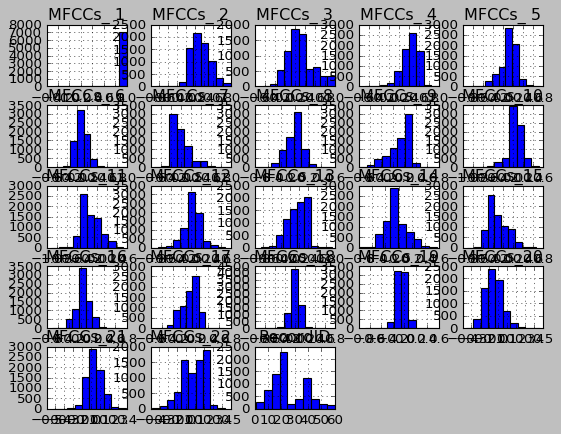

In [48]:
X_y.hist()

## Training model:

### Logistic Regression

In [49]:
lr = LogisticRegression(C=1e9)

# Logistic regression metrics
LRm = lr.fit(x_train, y_train)
LRm.predict_proba(x_test)  # The returned estimates for all classes are ordered by the label of classes.
y_pred = LRm.predict(x_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score using Logistic regression is 0.8036127836961556


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


At last, I want to try just use the useful independent variables, which is MFCCs_3, 4, 5, 6, 12, 19, 20, 21, 22, and see if the accuracy will be improved. However, I have a hard time when extracting specific columns out of the original dataset. I am going to work on that later.

## Conclusion:

In this assignment, the most suprising thing is that after preprocess my data, the accuracy did not increase. I think the reason is the row data has already meet the requirement mostly.

I am still curious about just using the useful independent variables during the predict. I will still trying to finish that part.

## Licensing:

Copyright 2021 Xiaoyang Jin

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Quoted URL：




unique np http://www.manongjc.com/article/48474.html

MinMaxScaler
https://www.cnblogs.com/qi-yuan-008/p/12608006.html